# Numerical solution to enzymatic degradation of a gel with electrostatic potential

From the notes we have the following equation for the rate at the surface of the gel:

$$ k_R(t) = K_Vc^o_{bulk}e^{-\beta U(R, t)} $$

where $k_R(t)$ is the surface reaction rate, $K_V$ is the rate at which enzymes encounter the gel, $c^o_{bulk}$ is the bulk concentration of the enzyme and $e^{-\beta U(R, t)}$ is the Boltzmann factor of the potential energy between the enzyme and and the hydrogel nanoparticle as a function of the radius of the nanoparticle ($R$) and time ($t$). The dependence on time comes from the fact that the radius is actually a function of time i.e. $R(t)$.

In reality, since the gel can have permeability, the enzymes can penetrate inside the gel and the reaction actually proceeds within a reaction volume where the so-called Effectively Accessible Reaction Volume ($V_{eff}$) is given by the following reaction (from Dibak et al.):

$$ V_{eff} = \int_{|{\bf{r}}|\leq R} e^{-\beta U(r, t)} d^3r$$


From the paper, the reaction rate (now just $k(t)$) would be expressed using the following equation:

$$ k(t) \approx \lambda V_{eff} $$

where $\lambda$ is described as the reaction propensity. There is another equation that describes the macroscopic rate:

$$ k(t) = \kappa ^2 D \int_{0}^{R} e^{-\beta U(r, t)} 4\pi r^2 dr + \mathcal{O}((\kappa R) ^4)$$

where $D$ is the diffusion constant of the enzyme and $\kappa = \sqrt{\frac{\lambda}{D}}$ is the inverse length, which describes the penetrative depth into the gel.

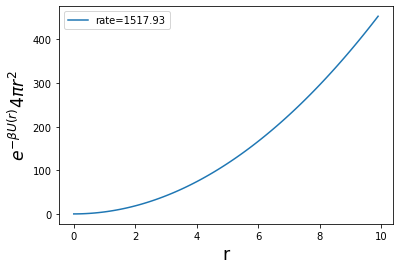

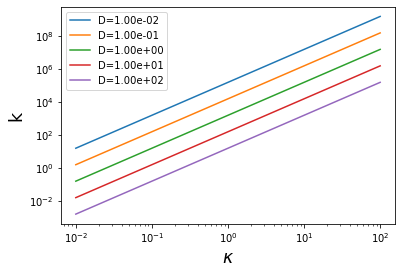

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def constant_potential(r, strength=1.0):
    return np.array([strength] * r.shape[0])

def boltzmann(energy_values, beta=1.0):
    return np.exp(-beta * energy_values)

def integrate_dr(values, dr):
    return np.sum(values * dr)

def rate(kappa, D, integral):
    return (kappa ** 2 / D) * integral
    
kappa = 1.0
D = 1.0
dr = 0.1
r = np.arange(0, 10, dr)
integrand = (4 * np.pi * r**2) * boltzmann(constant_potential(r))
integral = integrate_dr(integrand, dr)
k = rate(kappa, D, integral)

fig, ax = plt.subplots()
ax.plot(r, integrand, label=f"rate={k:.2f}")
ax.set_xlabel('r', fontsize='xx-large')
ax.set_ylabel(r"$e^{-\beta U(r)} 4\pi r^2$", fontsize='xx-large')
ax.legend()

fig_1, ax_1 = plt.subplots()
Ds = [0.01, 0.1, 1.0, 10.0, 100.0]
for D in Ds:
    kappas = [0.01, 0.1, 1.0, 10.0, 100.0]
    ks = []
    for kappa in kappas:
        ks.append(rate(kappa, D, integral))

    ax_1.plot(kappas, ks, label=f'D={D:.2e}')
ax_1.set_xscale('log')
ax_1.set_yscale('log')
ax_1.set_xlabel(r"$\kappa$", fontsize='xx-large')
ax_1.set_ylabel(r"k", fontsize='xx-large')
ax_1.legend()
None

## Real example - Electrostatic potential

In this example, the potential used will be electrostatic repulsion generated by the core of the gel:

$$ U(r) = q_E \times \frac{Q_{gel}}{4\epsilon r} $$

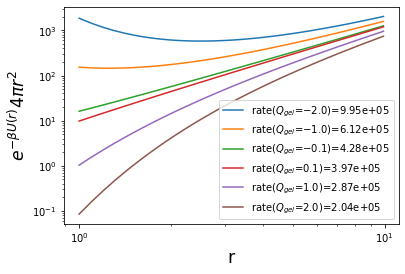

In [69]:
def electrostatic_core_repulsion(r, q_E, Q_gel, eps=1.0):
    return (q_E * Q_gel / 4 * eps) * (1./ r)

r = np.arange(1.0, 10., 0.1)
fig_core, ax_core = plt.subplots()
for Q in [-2., -1.0, -0.1, 0.1, 1.0, 2.]:
    integrand = (4 * np.pi * r**2) * boltzmann(electrostatic_core_repulsion(r, 1.0, Q, eps=10.))
    integral = integrate_dr(integrand, dr)
    k = rate(kappa, D, integral)
    ax_core.plot(r, integrand, label=f"rate($Q_{{gel}}$=${Q}$)={k:.2e}")
ax_core.set_xlabel('r', fontsize='xx-large')
ax_core.set_ylabel(r"$e^{-\beta U(r)} 4\pi r^2$", fontsize='xx-large')
ax_core.set_xscale('log')
ax_core.set_yscale('log')
ax_core.legend()
None

## Questions

1. What is the reaction propensity $\lambda$?
2. What is the potential field inside a homogeneous gel which each 'monomer' contributes to the overall charge?
3. Previously we calculated properties in an equilibrium setting - i.e. for a enzymatic reaction where the enzymes do not vanish when they react and the gel produces to electric field, the concentration of the enzymes is constant throughout space - is this the same when we are measuring the degradation as a function of time? Or do we change the boundary conditions to calculate the equilibrium concentration with no reaction (i.e. so the inside of the gel is empty)
4. Do we account for the fact that the enzymes cannot move through the gel as quickly as outside of the gel by changing the diffusion constant D?
5. What happens if the gel has a macroscopic pore network, how does change the diffusion constant?

## Cases
0. Make integrator
1. Surface reaction only - size of reactor as function of time i.e. gel cannot be penetrated
2. allow particles to penetrate into the gel - i.e. how does p(r) change in time - measure no. of molecules are attached to the overall gel - note that these 'sub-molecules' need to be detached from the gel physically and diffused away

(note also make ReaDDy simulations as well - see if this is possible to do this)